In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv('final.csv')
result = []
df1.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
2962,20,1.524,59.3,25.53,No,No_delivary,120,70,Normal,Normal,No,No,No,0,1
2675,26,1.447,57.0,27.19,No,No_delivary,110,70,Modarate,Normal,No,No,Yes,0,1
618,26,1.549,57.0,23.76,No,No_delivary,100,70,Normal,Normal,No,No,No,0,1
2918,36,1.600,68.6,26.79,No,C-section,120,70,Normal,Normal,No,No,Yes,1,2
1639,33,1.575,62.5,25.20,No,Normal,110,80,Normal,Normal,No,No,No,1,2


In [3]:
df1.shape

(3578, 15)

In [4]:
df1['Blood Group ( is Negative?)'] = df1['Blood Group ( is Negative?)'].map({'Yes':1,'No':0})
df1['Jaundice'] = df1['Jaundice'].map({'Yes':1,'No':0})
df1['Diabetes'] = df1['Diabetes'].map({'Yes':1,'No':0})
df1['Risk'] = df1['Risk'].map({'Yes':1,'No':0})
df1['Delivery Type'] = df1['Delivery Type'].map({'No_delivary':0,'Normal':1,'C-section':2})
df1['Edema'] = df1['Edema'].map({'Normal':0,'High':1,'Modarate':2})
df1['Anemia'] = df1['Anemia'].map({'Normal':0,'Low':1,'Very-Low':2})

In [5]:
df1.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
415,22,1.422,89.7,44.34,0,1,120,80,0,1,0,0,1,1,2
1130,26,1.524,61.0,26.26,0,1,130,90,0,0,0,0,0,1,2
3029,33,1.524,63.3,27.25,0,1,110,70,0,1,0,0,0,1,3
3033,34,1.473,63.4,29.21,0,0,120,80,2,0,0,0,0,0,1
1046,18,1.549,48.0,19.99,0,0,90,60,0,0,0,0,1,0,1


In [6]:
length = int(len(df1)*0.70)

train = df1[:length]
test = df1[length:]

x_train = train.drop(['Risk','Height','Weight'],axis=1)
y_train = train.Risk

x_test = test.drop(['Risk','Height','Weight'],axis=1)
y_test = test.Risk

In [7]:
train.shape

(2504, 15)

In [8]:
test.shape

(1074, 15)

In [9]:
# def model(model,i):
#     print(i,'.',model,':\n')
#     model = model.fit(x_train,y_train)

#     #train data
#     y_pred = model.predict(x_train)
#     print('\tTraining Data:')
#     print('\t\t> Accuracy: ', round(accuracy_score(y_train,y_pred),2)*100,'%',end=" ")
#     print('\t> f1_score: ', round(f1_score(y_train,y_pred),2)*100,'%',end=" ")
#     print('\t> precision_score: ', round(precision_score(y_train,y_pred),2)*100,'%',end=" ")
#     print('\t> recall_score: ', round(recall_score(y_train,y_pred),2)*100,'%',end=" ")

#     #test data
#     y_pred = model.predict(x_test)
#     print('\n\tTesting Data:')
#     print('\t\t> Accuracy: ', round(accuracy_score(y_test,y_pred),2)*100,'%',end=" ")
#     print('\t> f1_score: ', round(f1_score(y_test,y_pred),2)*100,'%',end=" ")
#     print('\t> precision_score: ', round(precision_score(y_test,y_pred),2)*100,'%',end=" ")
#     print('\t> recall_score: ', round(recall_score(y_test,y_pred),2)*100,'%','\n')

In [10]:
# model(LogisticRegression(),1)
# model(SVC(),2)
# model(DecisionTreeClassifier(),3)
# model(RandomForestClassifier(),4)
# model(KNeighborsClassifier(),5)
# model(GaussianNB(),6)
# model(MultinomialNB(),7)

In [11]:
# #best model
# model = RandomForestClassifier().fit(x_train,y_train)
# #train data
# y_train_pred = model.predict(x_train)
# print('Training Data:')
# print('\t> Accuracy:', round(accuracy_score(y_train,y_train_pred),2)*100,'%')
# print('\t> f1_score:', round(f1_score(y_train,y_train_pred),2)*100,'%')
# print('\t> precision_score:', round(precision_score(y_train,y_train_pred),2)*100,'%')
# print('\t> recall_score:', round(recall_score(y_train,y_train_pred),2)*100,'%')

# #test data
# y_test_pred = model.predict(x_test)
# print('\nTesting Data:')
# print('\t> Accuracy:', round(accuracy_score(y_test,y_test_pred),2)*100,'%')
# print('\t> f1_score:', round(f1_score(y_test,y_test_pred),2)*100,'%')
# print('\t> precision_score:', round(precision_score(y_test,y_test_pred),2)*100,'%')
# print('\t> recall_score:', round(recall_score(y_test,y_test_pred),2)*100,'%')

In [12]:
# tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
# print(tn,fp,fn,tp)

In [13]:
# accuracy = (tp+tn)/(len(test))
# accuracy

In [14]:
# f_score = (2*tp)/((2*tp)+fp+fn)
# f_score

In [15]:
# precision = tp/(tp+fp)
# precision

In [16]:
# recall = tp/(tp+fn)
# recall

In [17]:
# print(y_test.value_counts())
# # plt.figure(figsize=(10,8))
# ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,display_labels=['No Risk','Risk'])
# # print(cm)
# # sns.heatmap(cm,annot=True)
# # plt.savefig('Random Forest Confusion Matries.jpg')
# plt.show()

precision :  0.88
recall :  0.8
f1_masure :  0.84
se :  0.8
sp :  0.96
cc :  0.92
acc :  0.92
auc :  0.88


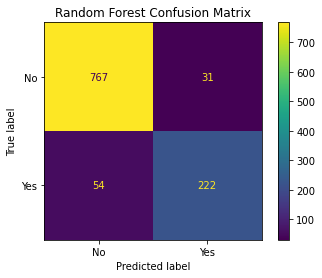

No as No   (TN):  767
No as Yes  (FP):  31
yes as No  (FN):  54
Yes as Yes (TP):  222


In [18]:
clf = RandomForestClassifier().fit(x_train,y_train)
RF_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,RF_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
cc = round(((tp+tn)/(tp+tn+fp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,RF_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("cc : ",cc)
print("acc : ",acc)
print("auc : ",auc_)

result.append({
    'Classifier': 'Random Forest',
    'Precision': precision,
    'Recall':recall,
    'F1-Measure':f1_masure,
    'Se':se,
    'Sp':sp,
    'CC':cc,
    'Accuracy':acc,
    'AUC':auc_
})

ConfusionMatrixDisplay.from_predictions(y_test,RF_pred,display_labels=['No','Yes'])
plt.title('Random Forest Confusion Matrix')
# plt.savefig('./con_mat/RF_confusion_matrix.jpg')
plt.show()
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)
print('Yes as Yes (TP): ',tp)

precision :  0.74
recall :  0.85
f1_masure :  0.79
se :  0.85
sp :  0.9
cc :  0.88
acc :  0.88
auc :  0.87


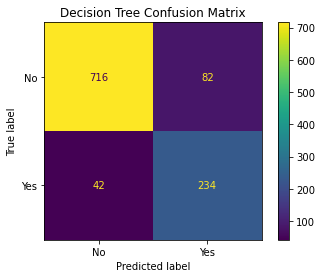

No as No   (TN):  716
No as Yes  (FP):  82
yes as No  (FN):  42
Yes as Yes (TP):  234


In [19]:
clf = DecisionTreeClassifier().fit(x_train,y_train)
DT_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,DT_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
cc = round(((tp+tn)/(tp+tn+fp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,DT_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("cc : ",cc)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Decision Tree',
    'Precision': precision,
    'Recall':recall,
    'F1-Measure':f1_masure,
    'Se':se,
    'Sp':sp,
    'CC':cc,
    'Accuracy':acc,
    'AUC':auc_
})

ConfusionMatrixDisplay.from_predictions(y_test,DT_pred,display_labels=['No','Yes'])
plt.title('Decision Tree Confusion Matrix')
# plt.savefig('./con_mat/DT_confusion_matrix.jpg')
plt.show()
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)
print('Yes as Yes (TP): ',tp)

precision :  0.88
recall :  0.32
f1_masure :  0.47
se :  0.32
sp :  0.98
cc :  0.81
acc :  0.81
auc :  0.65


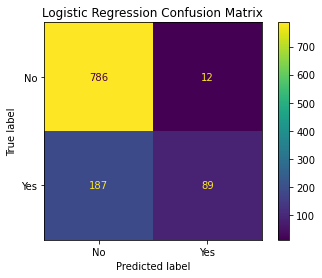

No as No   (TN):  786
No as Yes  (FP):  12
yes as No  (FN):  187
Yes as Yes (TP):  89


In [20]:
clf = LogisticRegression().fit(x_train,y_train)
Los_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,Los_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
cc = round(((tp+tn)/(tp+tn+fp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,Los_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("cc : ",cc)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Logistic Regression',
    'Precision': precision,
    'Recall':recall,
    'F1-Measure':f1_masure,
    'Se':se,
    'Sp':sp,
    'CC':cc,
    'Accuracy':acc,
    'AUC':auc_
})

ConfusionMatrixDisplay.from_predictions(y_test,Los_pred,display_labels=['No','Yes'])
plt.title('Logistic Regression Confusion Matrix')
# plt.savefig('./con_mat/Los_confusion_matrix.jpg')
plt.show()
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)
print('Yes as Yes (TP): ',tp)

precision :  0.76
recall :  0.5
f1_masure :  0.6
se :  0.5
sp :  0.95
cc :  0.83
acc :  0.83
auc :  0.72


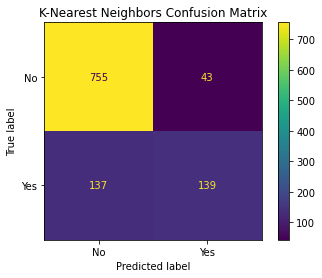

No as No   (TN):  755
No as Yes  (FP):  43
yes as No  (FN):  137
Yes as Yes (TP):  139


In [21]:
clf = KNeighborsClassifier().fit(x_train,y_train)
Knn_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,Knn_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
cc = round(((tp+tn)/(tp+tn+fp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,Knn_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("cc : ",cc)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'K-Nearest Neighbors',
    'Precision': precision,
    'Recall':recall,
    'F1-Measure':f1_masure,
    'Se':se,
    'Sp':sp,
    'CC':cc,
    'Accuracy':acc,
    'AUC':auc_
})

ConfusionMatrixDisplay.from_predictions(y_test,Knn_pred,display_labels=['No','Yes'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.savefig('./con_mat/knn_confusion_matrix.jpg')
plt.show()
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)
print('Yes as Yes (TP): ',tp)

precision :  0.96
recall :  0.08
f1_masure :  0.15
se :  0.08
sp :  1.0
cc :  0.76
acc :  0.76
auc :  0.54


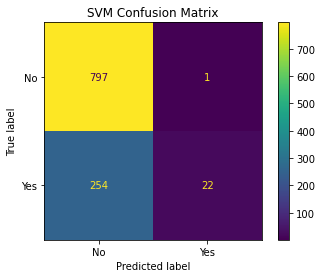

No as No   (TN):  797
No as Yes  (FP):  1
yes as No  (FN):  254
Yes as Yes (TP):  22


In [22]:
clf = SVC().fit(x_train,y_train)
svm_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,svm_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
cc = round(((tp+tn)/(tp+tn+fp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,svm_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("cc : ",cc)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'SVM',
    'Precision': precision,
    'Recall':recall,
    'F1-Measure':f1_masure,
    'Se':se,
    'Sp':sp,
    'CC':cc,
    'Accuracy':acc,
    'AUC':auc_
})

ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,display_labels=['No','Yes'])
plt.title('SVM Confusion Matrix')
# plt.savefig('./con_mat/SVM_confusion_matrix.jpg')
plt.show()
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)
print('Yes as Yes (TP): ',tp)

precision :  0.96
recall :  0.17
f1_masure :  0.29
se :  0.17
sp :  1.0
cc :  0.78
acc :  0.78
auc :  0.58


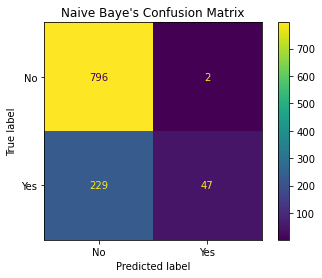

No as No   (TN):  796
No as Yes  (FP):  2
yes as No  (FN):  229
Yes as Yes (TP):  47


In [23]:
clf = GaussianNB().fit(x_train,y_train)
gnb_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,gnb_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
f1_masure = round((2*precision*recall)/(precision+recall),2)
se = round((tp/(tp+fn)),2)
sp = round((tn/(tn+fp)),2)
cc = round(((tp+tn)/(tp+tn+fp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
auc_ = round((roc_auc_score(y_test,gnb_pred)),2)

print("precision : ",precision)
print("recall : ",recall)
print("f1_masure : ",f1_masure)
print("se : ",se)
print("sp : ",sp)
print("cc : ",cc)
print("acc : ",acc)
print("auc : ",auc_)


result.append({
    'Classifier': 'Naive Baye\'s',
    'Precision': precision,
    'Recall':recall,
    'F1-Measure':f1_masure,
    'Se':se,
    'Sp':sp,
    'CC':cc,
    'Accuracy':acc,
    'AUC':auc_
})

ConfusionMatrixDisplay.from_predictions(y_test,gnb_pred,display_labels=['No','Yes'])
plt.title('Naive Baye\'s Confusion Matrix')
# plt.savefig('./con_mat/gnb_confusion_matrix.jpg')
plt.show()
print('No as No   (TN): ',tn)
print('No as Yes  (FP): ',fp)
print('yes as No  (FN): ',fn)
print('Yes as Yes (TP): ',tp)

In [24]:
pd.DataFrame(result).reset_index(drop=True).to_csv('./con_mat/result evaluation.csv')

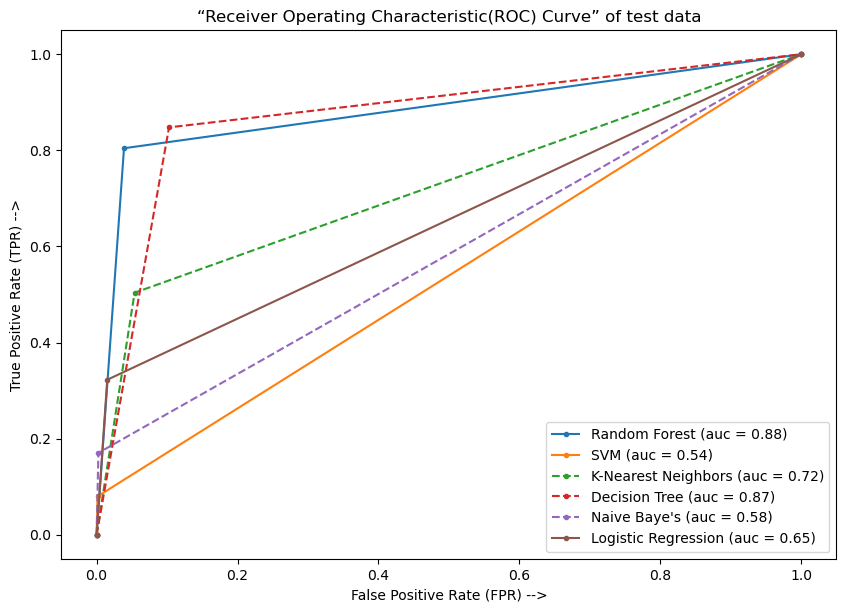

In [25]:
plt.figure(figsize=(10, 7), dpi=100)

def plot_roc(name,pred,i):
    fpr, tpr, threshold = roc_curve(y_test, pred)
    auc_ = auc(fpr,tpr)
    
    if i%2==0:
        plt.plot(fpr,tpr, linestyle='--',marker='.', label = name+' (auc = %0.2f)' % auc_)
    else:
        plt.plot(fpr,tpr, linestyle='-',marker='.', label = name+' (auc = %0.2f)' % auc_)
    i = i+1

plot_roc('Random Forest',RF_pred,1)
plot_roc('SVM',svm_pred,5)
plot_roc('K-Nearest Neighbors',Knn_pred,4)
plot_roc('Decision Tree',DT_pred,2)
plot_roc('Naive Baye\'s',gnb_pred,6)
plot_roc('Logistic Regression',Los_pred,3)

plt.title('“Receiver Operating Characteristic(ROC) Curve” of test data')
plt.xlabel('False Positive Rate (FPR) -->')
plt.ylabel('True Positive Rate (TPR) -->')

plt.legend()

# plt.savefig('./con_mat/all testing result ROC-AUC.jpg')
plt.show()